In [2]:
import pandas as pd
import numpy as np
import matplotlib as mtlp
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 

C:\Users\Sharon\AppData\Local\Temp\ipykernel_12948\2778721456.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#Importar datos
df = pd.read_csv("Drako-datos-campaña-awareness.csv")
df.head(5)

,Nombre de la cuenta,Día,Alcance,Impresiones,Frecuencia,Divisa,Importe gastado (USD),CPM (costo por mil impresiones),Inicio del informe,Fin del informe
0,NaN,NaN,82434,223003,2.705231,USD,81.48,0.365376,2024-04-01,2024-04-30
1,Drako EC,2024-04-25,2758,2893,1.048949,USD,0.83,0.286899,2024-04-01,2024-04-30
2,Drako EC,2024-04-24,3892,4079,1.048047,USD,1.14,0.279480,2024-04-01,2024-04-30
3,Drako EC,2024-04-23,6545,7462,1.140107,USD,2.39,0.320289,2024-04-01,2024-04-30
4,Drako EC,2024-04-22,6822,7746,1.135444,USD,2.28,0.294345,2024-04-01,2024-04-30


In [5]:
df.drop([0], axis=0, inplace=True)



In [6]:
df.head(5)

,Nombre de la cuenta,Día,Alcance,Impresiones,Frecuencia,Divisa,Importe gastado (USD),CPM (costo por mil impresiones),Inicio del informe,Fin del informe
1,Drako EC,2024-04-25,2758,2893,1.048949,USD,0.83,0.286899,2024-04-01,2024-04-30
2,Drako EC,2024-04-24,3892,4079,1.048047,USD,1.14,0.279480,2024-04-01,2024-04-30
3,Drako EC,2024-04-23,6545,7462,1.140107,USD,2.39,0.320289,2024-04-01,2024-04-30
4,Drako EC,2024-04-22,6822,7746,1.135444,USD,2.28,0.294345,2024-04-01,2024-04-30
5,Drako EC,2024-04-21,7531,8776,1.165317,USD,2.55,0.290565,2024-04-01,2024-04-30


In [7]:
#Seleccionar variables
from sklearn.linear_model import LinearRegression
x1 = "Importe gastado (USD)"
x2 = "CPM (costo por mil impresiones)"
y = "Alcance"

In [8]:
CPM_prom = df["CPM (costo por mil impresiones)"].mean()
Importe_prom = df["Importe gastado (USD)"].mean()
print(CPM_prom)
print(Importe_prom)

0.3437483366666667
3.3949999999999996


Coeficientes:  [  2175.75035005 -27411.15518332]
Intercepción:  10115.158228629447
Ecuación del plano: y = 2175.75 * Importe gastado (USD) + -27411.155 * CPM (costo por mil impresiones) + 10115.158
Coeficiente de determinación:  0.941


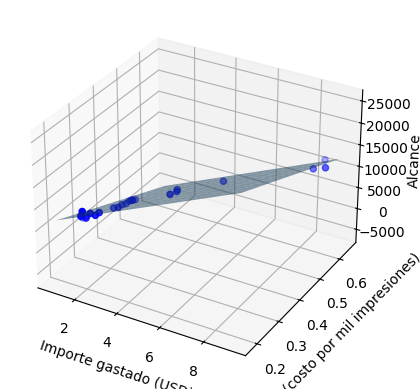

In [9]:
variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression() # generamos la regresión lineal
modelo.fit(df[variables_x], df[variable_y])# entrenamos el modelo
print ('Coeficientes: ', modelo.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_) #obtenemos la intercepción
# Imprimir la ecuación del plano
print('Ecuación del plano: y = {} * Importe gastado (USD) + {} * CPM (costo por mil impresiones) + {}'.format(round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)))
print ('Coeficiente de determinación: ', round(r2_score(df[variable_y], modelo.predict(df[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x1], df[x2], df[y], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(df[x1].min(), df[x1].max(), num=10)
y = np.linspace(df[x2].min(), df[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Alcance")
plt.show()

In [12]:
# Generar predicción 

Importe_gastado_USD = 3
CPM = 0.34

prediccion_nueva = pd.DataFrame({x1: [Importe_gastado_USD], x2: [CPM]})
alcance_prediccion = modelo.predict(prediccion_nueva)
print('La predicción de alcance generado para', 
      Importe_gastado_USD, 'dólares de presupuesto publicitario diario y un', 
      CPM, 'de CPM', 
      round(alcance_prediccion[0], 3))

La predicción de alcance generado para 3 dólares de presupuesto publicitario diario y un 0.34 de CPM 7322.617
